<a href="https://colab.research.google.com/github/DonghaeSuh/NLP_Pytorch/blob/main/Model/BERT/BERT_NLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Git Clone

In [ ]:
ls

drive/  sample_data/


In [5]:
cd drive/MyDrive/Pytorch\ NLP/BERT/data_in

/content/drive/MyDrive/Pytorch NLP/BERT/data_in


In [6]:
ls

KorNLUDatasets/  nsmc/


In [ ]:
!git clone 'https://github.com/kakaobrain/KorNLUDatasets.git'

Cloning into 'KorNLUDatasets'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (2/2), done.
remote: Total 16 (delta 1), reused 1 (delta 1), pack-reused 14
Unpacking objects: 100% (16/16), 46.67 MiB | 5.05 MiB/s, done.
Updating files: 100% (9/9), done.


In [ ]:
ls

KorNLUDatasets/  nsmc/


## Huggingface Transformers 라이브러리

In [7]:
cd ..

/content/drive/MyDrive/Pytorch NLP/BERT


In [8]:
ls

BERT_NLI.ipynb                  data_in/   transformers/
BERT_Text_Classification.ipynb  data_out/


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.4 MB/s eta 0:00:00


# 데이터 분석

In [3]:
import numpy as np
import pandas as pd
from transformers import *

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

## BertTokenizer 기반 문장 길이 분석

### 데이터 마련

In [9]:
multinli_df= pd.read_csv('data_in/KorNLUDatasets/KorNLI/multinli.train.ko.tsv',sep='\t',error_bad_lines=False)
multinli_df.head()

<ipython-input-9-5126d32c1d53>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  multinli_df= pd.read_csv('data_in/KorNLUDatasets/KorNLI/multinli.train.ko.tsv',sep='\t',error_bad_lines=False)
Skipping line 24426: expected 3 fields, saw 4
Skipping line 156343: expected 3 fields, saw 4
Skipping line 218766: expected 3 fields, saw 4
Skipping line 232318: expected 3 fields, saw 4
Skipping line 253493: expected 3 fields, saw 4

Skipping line 265734: expected 3 fields, saw 4
Skipping line 282588: expected 3 fields, saw 4
Skipping line 350969: expected 3 fields, saw 4



,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral


In [ ]:
len(multinli_df)

385494

In [10]:
snli_df=pd.read_csv('data_in/KorNLUDatasets/KorNLI/snli_1.0_train.ko.tsv',sep='\t',error_bad_lines=False)
snli_df.head()

<ipython-input-10-b96cd5b7fc92>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  snli_df=pd.read_csv('data_in/KorNLUDatasets/KorNLI/snli_1.0_train.ko.tsv',sep='\t',error_bad_lines=False)


,sentence1,sentence2,gold_label
0,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 경쟁을 위해 말을 훈련시키고 있다.,neutral
1,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 식당에서 오믈렛을 주문하고 있다.,contradiction
2,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,사람은 야외에서 말을 타고 있다.,entailment
3,카메라에 웃고 손을 흔드는 아이들,그들은 부모님을 보고 웃고 있다,neutral
4,카메라에 웃고 손을 흔드는 아이들,아이들이 있다,entailment


In [ ]:
len(snli_df)

550152

In [11]:
train_df=pd.concat([multinli_df,snli_df],axis=0)
train_df.head()

,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral


In [ ]:
len(train_df)

935646

In [ ]:
sentences=pd.Series(train_df['sentence1'].tolist()+train_df['sentence2'].tolist())
sentences.head()

0            개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다
1    시즌 중에 알고 있는 거 알아 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스가...
2                     우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다
3                           어떻게 아세요 이 모든 것이 다시 그들의 정보다
4    그래 만약 네가 테니스화 몇 개를 사러 간다면 나는 왜 그들이 100달러대에서 오르...
dtype: object

In [ ]:
len(sentences)

1871292

### BertTokenizer 불러오기

In [ ]:
tokenizer=BertTokenizer.from_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

In [ ]:
cache_dir='.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba' # root 폴더 내에서

In [ ]:
tokenizer.tokenize('안녕 나는 사람이야')

['안', '##녕', '나는', '사람이', '##야']

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
sent_len = sentences.astype(str).progress_apply(lambda x : len(tokenizer.tokenize(x)))
sent_len

100%|██████████| 1871292/1871292 [06:19<00:00, 4930.27it/s]


0          24
1          83
2          21
3          15
4          41
           ..
1871287    16
1871288    24
1871289    17
1871290    18
1871291    23
Length: 1871292, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

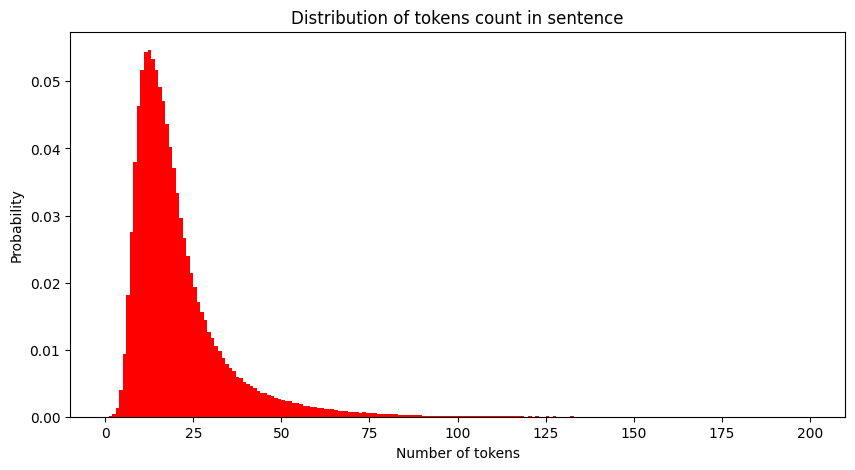

In [ ]:
plt.figure(figsize=(10,5))

plt.hist(sent_len,bins=200,range=[0,200],color='r',density=True,label='train')
plt.title('Distribution of tokens count in sentence')
plt.xlabel('Number of tokens')
plt.ylabel('Probability')
plt.show()

In [ ]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(sent_len)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(sent_len)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(sent_len)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(sent_len)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(sent_len, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(sent_len, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(sent_len, 99)))

문장 tokens 개수 최대 값: 9006
문장 tokens 개수 평균 값: 20.24
문장 tokens 개수 표준편차: 26.77
문장 tokens 개수 중간 값: 16.0
문장 tokens 개수 제 1 사분위: 11.0
문장 tokens 개수 제 3 사분위: 24.0
문장 tokens 개수 99 퍼센트: 72.0


- 3사분위에 해당하는 24를 사용.
- 2개의 문장이 합쳐짐으로 인해 48을 MAX_LEN으로 사용

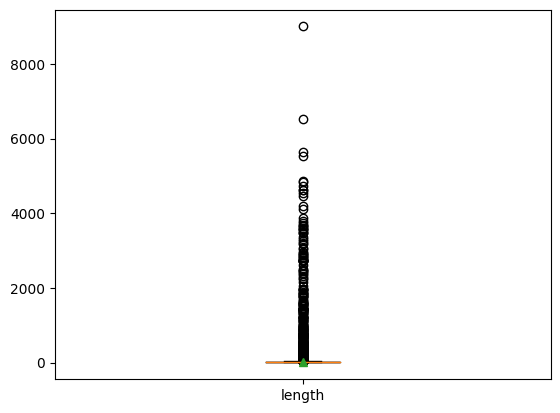

In [ ]:
plt.boxplot(sent_len,labels=['length'],showmeans=True)
plt.show()

## 라벨 데이터 분포 확인

<Axes: xlabel='gold_label', ylabel='count'>

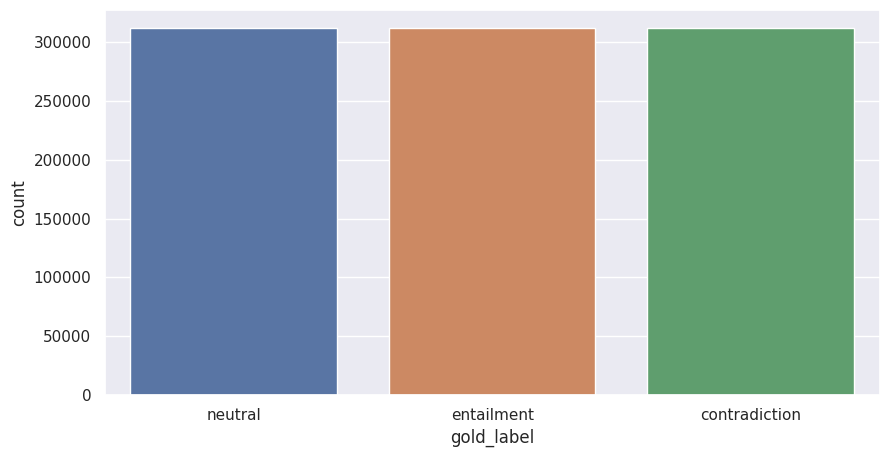

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data=train_df,x=train_df['gold_label'])

## 특수 문자 확인

In [ ]:
print('구두점 포함 문장 비율 : {:.2f}'.format(np.mean(sentences.astype(str).progress_apply(lambda x : '.' in x))))

100%|██████████| 1871292/1871292 [00:03<00:00, 561170.67it/s]

구두점 포함 문장 비율 : 0.00


# 전처리

In [14]:
ls

BERT_NLI.ipynb                  data_in/   transformers/
BERT_Text_Classification.ipynb  data_out/


In [15]:
cd data_in/KorNLUDatasets/KorNLI

/content/drive/MyDrive/Pytorch NLP/BERT/data_in/KorNLUDatasets/KorNLI


In [12]:
train_df['sentence1']=train_df['sentence1'].str.replace('[^ a-zA-Z0-9가-힣]',"")
train_df['sentence2']=train_df['sentence2'].str.replace('[^ a-zA-Z0-9가-힣]',"")
train_df.dropna()
train_df

<ipython-input-12-46595627b075>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['sentence1']=train_df['sentence1'].str.replace('[^ a-zA-Z0-9가-힣]',"")
<ipython-input-12-46595627b075>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['sentence2']=train_df['sentence2'].str.replace('[^ a-zA-Z0-9가-힣]',"")


,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다,제품과 지리학은 크림 스키밍을 작동시키는 것이다,neutral
1,시즌 중에 알고 있는 거 알아 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스가...,사람들이 기억하면 다음 수준으로 물건을 잃는다,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다,entailment
3,어떻게 아세요 이 모든 것이 다시 그들의 정보다,이 정보는 그들의 것이다,entailment
4,그래 만약 네가 테니스화 몇 개를 사러 간다면 나는 왜 그들이 100달러대에서 오르...,테니스화의 가격은 다양하다,neutral
...,...,...,...
550147,네 명의 더러운 맨발의 아이들,4명의 아이들이 가장 깨끗한 발로 상을 받았다,contradiction
550148,네 명의 더러운 맨발의 아이들,네 명의 노숙자 아이들이 신발을 도둑맞아서 그들의 발이 더러워졌다,neutral
550149,한 남자가 아름다운 푸른 물에서 바디슈트를 입고 서핑을 하고 있다,바디슈트를 입은 남자가 서핑 대회에 참가하고 있다,neutral
550150,한 남자가 아름다운 푸른 물에서 바디슈트를 입고 서핑을 하고 있다,비즈니스 슈트를 입은 남자가 이사회로 향하고 있다,contradiction


In [16]:
train_df.to_csv('train_df.csv',index=False)

In [13]:
test_df=pd.read_csv('data_in/KorNLUDatasets/KorNLI/xnli.dev.ko.tsv',sep='\t',error_bad_lines=False)
test_df

<ipython-input-13-b7bf7ea79b21>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_df=pd.read_csv('data_in/KorNLUDatasets/KorNLI/xnli.dev.ko.tsv',sep='\t',error_bad_lines=False)


,sentence1,sentence2,gold_label
0,"그리고 그가 말했다, ""엄마, 저 왔어요.""",그는 학교 버스가 그를 내려주자마자 엄마에게 전화를 걸었다.,neutral
1,"그리고 그가 말했다, ""엄마, 저 왔어요.""",그는 한마디도 하지 않았다.,contradiction
2,"그리고 그가 말했다, ""엄마, 저 왔어요.""",그는 엄마에게 집에 갔다고 말했다.,entailment
3,내가 무엇을 위해 가고 있는지 또는 어떤 것을 위해 있는지 몰랐기 때문에 워싱턴의 ...,나는 워싱턴에 가본 적이 없어서 거기 배정을 받았을 때 그 장소를 찾으려다가 길을 ...,neutral
4,내가 무엇을 위해 가고 있는지 또는 어떤 것을 위해 있는지 몰랐기 때문에 워싱턴의 ...,워싱턴으로 진군하면서 해야 할 일이 무엇인지 정확히 알고 있었다.,contradiction
...,...,...,...
1566,피스티는 피즐처럼 중간 영어의 피스틴으로 시작되어 방귀를 뀌기 위해 주먹을 쥐었다.,Fiesty는 100년 동안 존재해 왔다.,neutral
1567,피스티는 피즐처럼 중간 영어의 피스틴으로 시작되어 방귀를 뀌기 위해 주먹을 쥐었다.,Fiesty는 주먹질과는 무관하다.,contradiction
1568,"진술이 더 나은 반면, 대답은 완성의 정신적 그림을 준다.",진술은 더 자세한 내용을 알려준다.,neutral
1569,"진술이 더 나은 반면, 대답은 완성의 정신적 그림을 준다.",진술이 더 나은 것은 아니다.,contradiction


In [17]:
test_df.to_csv('test_df.csv',index=False)

# BERT 입력 데이터 준비

- BertTokenizer를 이용하여 3개의 입력 준비
1. input_ids / 2. padding_masks / 3. token_type_ids
- 동시에 label도 같이 저장하여
- torch.Tensor 형태로 저장

### Transformers 라이브러리 불러오기

In [ ]:
pip install transformers

In [45]:
import transformers

In [23]:
import numpy as np
import pandas as pd
from transformers import *

In [24]:
tokenizer=BertTokenizer.from_pretrained('bert-base-multilingual-cased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/tokenizer_config.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/fdfce55e83dbed325647a63e7e1f5de19f0382ba/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

### BertTokenizer 사용

In [19]:
train_df=pd.read_csv('train_df.csv')
test_df=pd.read_csv('test_df.csv')

In [20]:
MAX_LEN = 24*2 # 3사분위 값인 24가 두개 연결되기에 2배 해줌

In [29]:
def bert_tokenizer(text1,text2,MAX_LEN):

  encoded_dict=tokenizer.encode_plus(text1,
                                     text2,
                                     max_length=MAX_LEN,
                                     padding='max_length',
                                     truncation=True,
                                     return_attention_mask=True,
                                     return_token_type_ids=True)

  return encoded_dict['input_ids'],encoded_dict['attention_mask'],encoded_dict['token_type_ids']

In [31]:
bert_tokenizer('안녕 나는 사람이야','그래 너는 사람이야',15)

([101,
  9521,
  118741,
  100585,
  97802,
  21711,
  102,
  8924,
  37388,
  9004,
  11018,
  97802,
  21711,
  102,
  0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [39]:
tokenizer.decode(bert_tokenizer('안녕 나는 사람이야','그래 너는 사람이야',15)[0])

'[CLS] 안녕 나는 사람이야 [SEP] 그래 너는 사람이야 [SEP] [PAD]'

In [32]:
from tqdm import tqdm

In [34]:
# 라벨 정수 변환 처리
txt2id={'neutral':0, 'contradiction':1, 'entailment':2}

In [40]:
import torch

In [46]:
transformers.logging.set_verbosity_error()

In [50]:
train_input_ids=[]
train_attention_masks=[]
train_token_type_ids=[]
train_label=[]

for text1,text2,label in tqdm(zip(train_df['sentence1'],train_df['sentence2'],train_df['gold_label']),total=len(train_df)):

  try:
    input_ids,attention_mask,token_type_ids=bert_tokenizer(text1,text2,MAX_LEN)

    train_input_ids.append(input_ids)
    train_attention_masks.append(attention_mask)
    train_token_type_ids.append(token_type_ids)

    train_label.append(txt2id[label])
  except Exception as e:
    print(e)
    print(text1,text2)
    pass

train_input_ids=torch.LongTensor(train_input_ids)
train_attention_masks=torch.LongTensor(train_attention_masks)
train_token_type_ids=torch.LongTensor(train_token_type_ids)
train_label=torch.LongTensor(train_label)

  0%|          | 376/935646 [00:00<09:06, 1710.09it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
원주민 내가 이기고 나는 큰 법을 어기고 nan


  0%|          | 3451/935646 [00:02<15:42, 988.77it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
생제르맹 nan


  1%|          | 10661/935646 [00:08<14:04, 1095.47it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
날씨에 따라서든 그렇지 않든 nan


  2%|▏         | 17055/935646 [00:11<08:19, 1840.60it/s]

nan
그는 전쟁 전에 가벼운 벅스킨 암말을 가지고 달리기 위해 우유처럼 하얀 스터드를 넣었다전쟁 전에 다인종 여성들과 함께 있는 백인 남자가 있었다entailment슬림은 재빨리 옷을 입었고 순간적으로 미지근한 물을 뿌릴 수 있는 아침 세탁물을 기꺼이 가두었다슬림은 직장에 늦었다neutral뉴욕에서 그 식사를 해봤는데 거기서 소고기의 멋진 소고기 부분을 요리하고 바베큐로 만든 널빤지 같은 걸 가져왔는데 정말 대단해그들이 거기서 요리하는 쇠고기는 역겹다 거기서 절대 먹지 마라contradiction판매원의 죽음에서 브라이언 데네히 크리스 켈리크리스 켈리는 세일즈맨의 죽음을 언급하지 않는다contradiction그러는 동안 요리사는 그냥 화가 났어스튜가 끓는 동안 요리사는 화가 났다neutral마지막 로마의 맹공격 전날 밤 900명 이상의 유대인 수비수들이 로마인들에게 그들을 사로잡는 승리를 주기 보다는 대량 자살을 저질렀다로마인들이 그들의 포획에 승리하도록 내버려두기 보다는 900명의 유대인 수비수들이 자살했다entailment앞으로 발사하라발사neutral그리고 당신은 우리 땅이 에이커에 있다는 것을 알고 있다 우리 사람들은 어떤 것이 얼마나 많은지 이해하지 못할 것이다모든 사람들은 우리의 측정 시스템이 어떻게 작동하는지 알고 이해합니다contradiction주미게스Jumiyges는 도시의 이름이다neutral사람은 자기 민족을 돌봐야 한다사람은 조국에 공감해야 한다entailment또한 PDD 63은 정부와 업계가 컴퓨터 기반 공격에 대해 경고하고 방어할 준비를 더 잘할 수 있도록 시스템 취약성 위협 침입 및 이상에 대한 정보를 공유하는 메커니즘을 수립하는 것이 중요하다는 것을 인식했습니다정보 전송 프로토콜을 만드는 것은 중요하다entailment카페 링 피아자 델라 레퓌블리카 바로 남쪽에는 피렌체가 알려진 짚 제품 때문에 한때 스트로 마켓이라고 불렸던 16세기 로지아인 메르카토 누오보Mercato Nuovo가 있다피아자 델라 레퓌블리카에는 카페가 많이 있

  2%|▏         | 20099/935646 [00:13<07:40, 1988.27it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
AICPA 미국 공인 회계사 APB 회계 원칙 이사회 ARB 회계 연구 게시판 COSO 트레드 웨이위원회 조직위원회 FAS 재무 회계 기준 FASB 재무 회계 기준위원회 FASAB 연방 회계 기준 자문위원회 FIN FASB Interpertation Form amp Content OMB Bulletin 9701  1996 년 10 월 16 일 발행 GAO 일반 회계 사무소 NAA 전국 회계사 협회 OMB 관리 및 예산 사무국 SEC 증권 거래위원회 SFFAC 연방 재무 회계 개념 명세서 SFFAS 연방 재무 회계 표준 명세서 SOP 포지션 명세서 nan


  3%|▎         | 30245/935646 [00:18<07:46, 1941.55it/s]

nan
안세는안세에게 무슨 일이 일어날까 entailment


  4%|▎         | 33667/935646 [00:21<13:26, 1118.80it/s]

nan
어떻게 해서든 그를 없애라 트린판우리를 내버려둘 수 있도록 네 칼로 그를 죽여라 트린판 neutral


  4%|▎         | 34340/935646 [00:22<13:44, 1093.75it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
토니 슈즈그래서 클린턴은 슈즈와 양말을 갖게 될 것이다 nan


  4%|▍         | 38116/935646 [00:25<08:14, 1813.87it/s]

nan
하늘이 무너지고 있어 데이브 핸슨하늘이 우리 쪽으로 내려오고 있어 데이브 핸슨 entailment
nan
하늘이 무너지고 있어 데이브 핸슨하늘이 우리에게 착륙해서 우리를 짓뭉개버릴 거야 데이브 핸슨 neutral


  5%|▌         | 46905/935646 [00:29<07:46, 1903.24it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
불륜을 저지르지 마라 nan
nan
나는 당신의 큰 비밀에 대해 모두 알고 있소뭔가 비밀로 하고 있는 거야 contradiction


  5%|▌         | 48700/935646 [00:30<07:44, 1908.76it/s]

nan
그들은 섞여 있고 일부는 스크럽 근친 교배 가난한 것들입니다그들은 모두 똑같다contradiction마찬가지로 내가 전에 말했듯이 카터가 너희 둘을 이런 일에 끌어들인 것은 유감스러운 일이다카터는 분명히 너희 둘을 이 일에 끌어들였어야 했어contradiction그리고 플라노와 캠벨이 애완견이라고 하셨잖아요플라노와 캠벨에 대해 애완견은 없다고 대답하셨잖아요contradiction납세자 반환 정보 보호된 은행 정보 대배심 정보 및 여행 상품권에 나열된 신용카드 계정여행 상품권에는 민감한 정보가 많이 들어 있다entailment나는 당신이 많은 사람들이 가지고 있는 그 원한한 태도를 지나쳐야 한다는 것을 알지만 그것은 아마도 결코 봉사하지 않을 어른들에게 그것을 지역사회에 파는 것의 일부분이 될 것이고 후손 세대들에게는 각 카운티마다 각 지역사회에서 주요 홍보 캠페인이 있어야 할 것이다나는 네가 너의 옛 상사를 원망하지 말아야 한다는 것을 안다neutral이 뛰어난 살롱 드 가스파리니는 석공 조각가 유리꽃 시계제작자 실버스미스 캐비닛 제작자 수놓는 사람을 동원하여 이 놀라운 로코코의 예를 만들어 낸 예술가나폴리의 마티아스 가스파리니의 이름을 따서 지어졌다살롱 드 가스파리니는 마티아스 가스파리니의 이름을 딴 유일한 건물이었다neutral사용된 접근법의 차이는 아마도 투자에 대한 재정적 수익보다는 비재무적 프로그램 혜택에 초점을 맞추는 것을 포함하여 연방 CIO 환경의 특정 제약에서 비롯되었을 것이다비금융 프로그램 혜택은 연방 CIO 환경에 구속되지 않는다contradiction그래 100도 10도섭씨 2도contradiction부록 J 표 3 대기질 계획 및 표준 사무소 연구 삼각 공원 NC대기질 계획 및 표준 사무소는 뉴욕에 있다contradiction해가 지고 하늘이 완전히 갈기갈기 찢어지면서 이 세상은 확실히 망했다하늘이 산산조각이 나고 있다entailment프론티어 에티켓은 켄터키 관습과 달랐다 확실하지 않을 때 조용히 하는 것이 더 안전했다켄터키 관

  5%|▌         | 50305/935646 [00:31<07:40, 1922.71it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
웨스 위드마이어 nan


  6%|▌         | 51873/935646 [00:32<07:51, 1875.78it/s]

nan
Yankees th brand at just at home 다른 사람들이 촬영이 끝나면 진짜 싸울 준비를 하도록 내버려둬라양키들도 전쟁 중이었다entailment팀 카벨의 랩업팀 카벨은 공인이다entailment나는 그것이 싫었던 것을 가지고 있었다 어 특별한 저녁식사를 위해 어떤 식사를 요리하겠는가 내 말은 그것이 좋았지만 그 한 끼는 얼마나 멀리 갈 수 있는가 하는 것이다모든 질문들은 정말 나빴다contradiction그녀는 점심 메뉴를 바꿔야 했고 그것은 그녀가 일주일 동안 함께 살 가치가 없다는 것을 의미한다그녀는 점심 메뉴가 바뀌어서 다음 주에 살 가치가 없을 것이다entailment그리고 그들은 우리가 가지고 다녀야 할 한 명의 의붓자식으로서 매우 빠르게 큰 재정적 부담이 될 수 있다한 명의 의붓자식은 재정적인 부담이 될 수 있다entailment오 미안 잘못된 웹 페이지야오 잘못된 웹 페이지야 미안entailment켄투키아인이 어린 시절부터 자라기 시작한 자급자족의 지각을 깨뜨린 사람은 거의 없었다켄투키아인들은 자급자족한다 왜냐하면 그것이 그들의 상태로 만들기 위해 필요한 것이기 때문이다neutral2000년 희년을 위한 관대하게 연장된 시간이 효력을 유지할지는 누구나 추측할 수 있다우리는 희년 200년에서 연장된 시간이 계속될 것이라는 것을 알고 있다contradiction그러나 몇몇 보안 관리자는 자동화된 모니터링 도구의 개발이 새로운 컴퓨터 및 네트워크 기술의 도입에 뒤쳐지고 있으며 이는 사고 특히 허가되지 않은 침입을 탐지하려는 노력을 손상시켰다고 말했다자동화된 탐지 도구가 새로운 기술을 따라잡고 있다contradiction브래들리가 고어만큼 선거운동원이라는 것이 몇 번이고 지적될 것이다고어는 역대 최고의 운동가였다contradiction오늘날 마드리드는 그 응집력 있는 센터 그 이상이다마드리드는 좋은 위치에 있다neutral베네치아 성벽은 여전히 역사적인 도시 알타언덕 위의 도시 유괴로 도시 바사와 연결된 마을의 오래된 지역를 보호

  6%|▌         | 55571/935646 [00:35<12:27, 1178.05it/s]

nan
그런 것들은그는 그런 것에 전혀 관심을 보이지 않았다contradiction그래서 그들은 세계적인 관점을 취하고 있습니다그들은 마음을 바꾸고 세계관을 취하고 있다neutral3과 어 4와 26번과 어 7번과 5번contradiction그러므로 구약성서 전체가 외계인의 작품이라고 추론하는 것은 완벽하게 논리적이다오직 외계인만이 구약성서에 있는 것을 읽을 수 있었다neutral이곳은 5월의 국제 영화제와 1월에 녹음된 음악 축제MIDEM의 장소다이곳은 국제 영화와 녹음된 음악 축제가 열린 가장 큰 장소다neutral나는 우리가 그녀의 불안을 덜어줄 수 있다고 생각한다나는 우리가 그녀를 도울 수 있다고 생각하지 않아contradiction새로운 두려움이 그의 마음을 사로잡았다그는 공포에 사로잡혔다entailment그래 맞아 그래서 이건 나한테 경험이었어 그리고 어 하지만 난 우리가 앞마당에 나갈 시간이 좀 더 있을 때까지 기다릴 수 없어 그리고 정말 많은 조경을 알고 있지나는 꽤 큰 마당을 가지고 있는데 그 중 일부를 정원으로 바꿀 것 같다neutral나폴레옹의 매장은 1840년 12월 15일에 이루어졌다그의 매장은 12월에 열렸다entailment그리고 다시 한 번 데리는 내가 아침의 바보 같은 시간에 그녀의 문을 쾅쾅 두드리는 것을 발견했다아침에 데리의 문을 두드린 것은 이번이 처음이었다contradiction하지만 어떤 것들은 진지하다는 것을 알고 있고 어떤 것들은 진지하다는 것을 알고 있지만 음 모든 재미는 그들이 가득 찬 것을 보는 것이다 그들은 어른들을 위한 것이라는 것을 알고 있다 그들은 단지 어린 만화가 아니다 그들은 진정한 이야기들이다그것들은 오직 아이들을 위한 것이고 어른들의 이야기는 없다contradiction데이브가 무엇을 멈출 것인지 묻기도 전에 네마가 서둘러 방으로 들어왔다데이브가 무엇을 막아야 하는지 물었을 때 네마는 어디에도 보이지 않았다contradiction산 가브리엘포모나 밸리 프로그램의 전무인 로라레아 사딕은 자신의 이사회

  6%|▌         | 55942/935646 [00:35<13:36, 1076.86it/s]

nan
나는 즉시 그렇게 해오늘은 그럴 계획이 없어 contradiction


  6%|▌         | 56624/935646 [00:36<13:24, 1092.93it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
그래 아니 네가 아는 그 지역은 아니야 네가 아는 TI 공장이야 네가 아는 한 그들이 무엇을 만들고 날씨를 제외한 모든 것을 nan


  6%|▋         | 59234/935646 [00:39<16:27, 887.69it/s]

nan
그의 나라에서 가장 런닝한 말 캘리그 말은 칭찬을 받았고 캘리에게 언급되었다entailment영국인들은 병사들과 동인도 회사 직원들이 평원의 병폐로부터 회복하기에 건강한 장소가 될 것이라고 믿었지만 무엇보다도 그들은 이 지역이 많은 논란이 되고 있는 네팔로의 통행권을 통제하는 데 전략적으로 유용하다는 것을 발견했다영국인들은 그 장소가 즐겁지만 어떤 식으로든 전략적으로 유용하지는 않다고 생각했다contradiction코즈웨이 로드에 있는 빅토리아 공원의 동쪽에는 틴 하우 사원이 있는데 틴 하우 천상의 도교 여왕 선원들의 후견인이다코즈웨이 도로는 공원의 서쪽에 있다contradiction코헨 1993 이 문제에 대해 우려하는 한 가지 이유는 사설 익스프레스 법령이 완화된다면 경쟁자들은 수익성 있는 노선을 택하여 현 정부를 수익성이 없는 노선으로 떠날 가능성이 있기 때문이다프라이빗 익스프레스 법령의 요건이 완화되면 행정부는 수익성을 유지하기 위해 고군분투할 것이다entailment좋은 게임으로 밝혀졌네나는 그들이 잘 할 것이라고 예측했다neutral두오모의 테라코타 큐폴라가 지배하는 도시의 마지막 전경을 보려면 버스나 택시를 타고 광대한 피아잘 미켈란젤로그의 데이빗의 두 번째 사본으로 장식로 가십시오피아잘 미켈란젤로는 캣의 사본에 의해 정박되어 있다 contradiction


  7%|▋         | 65672/935646 [00:43<07:31, 1926.31it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
7 Soderstrom CA Smith GS Dischinger PC McDuff DR Hebel JR Gorelick DA 등 nan


  7%|▋         | 68056/935646 [00:44<07:27, 1936.92it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
Vendme Opra Madeleine nan


  8%|▊         | 73942/935646 [00:48<07:36, 1885.84it/s]

nan
데이브 핸슨 당신네 세계에서는 공학 예술에 정통했군 대부분의 사람들보다데이브 핸슨 당신은 당신 세계의 대부분의 사람들보다 공학에 대해 훨씬 더 많이 알고 있었소 entailment


  8%|▊         | 76101/935646 [00:49<07:55, 1808.91it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
웨스 위드마이어 nan
nan
캘리포니아에 대해 생각해 본 적 있어 안세어린 소녀가 물었다 안세 캘리포니아에 대해 생각해 본 적 있니 neutral


  9%|▊         | 80889/935646 [00:52<13:28, 1057.45it/s]

nan
드류가 왜 시작됐는지 모르겠어나는 정확히 이유를 알 수 있다 드류는 끝을 맺었다 contradiction


  9%|▉         | 82850/935646 [00:54<13:05, 1085.48it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
비엔나 소음 합창단 nan


  9%|▉         | 84841/935646 [00:56<12:51, 1102.16it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
AICPA 미국 공인 회계사 APB 회계 원칙 이사회 ARB 회계 연구 게시판 COSO 트레드 웨이위원회 조직위원회 FAS 재무 회계 기준 FASB 재무 회계 기준위원회 FASAB 연방 회계 기준 자문위원회 FIN FASB Interpertation Form amp Content OMB Bulletin 9701  1996 년 10 월 16 일 발행 GAO 일반 회계 사무소 NAA 전국 회계사 협회 OMB 관리 및 예산 사무국 SEC 증권 거래위원회 SFFAC 연방 재무 회계 개념 명세서 SFFAS 연방 재무 회계 표준 명세서 SOP 포지션 명세서 nan


 10%|▉         | 92800/935646 [01:00<07:21, 1910.43it/s]

nan
조니는 글로리에타에서 유일한 소년이 아니었다조니는 글로리에타에 있었다entailment이런 뱀들 그가 사정했다이런 뱀들아 믿을 수가 없군 그가 소리쳤다 neutral


 10%|█         | 96093/935646 [01:02<07:50, 1783.05it/s]

nan
우리 불쌍한 렙스 나머지 사람들은 전쟁에서 철수하는 게 좋을 거야당신은 우리 렙스의 나머지 사람들보다 전쟁에서 더 잘 벗어났음에 틀림없다 entailment
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
Vendme Opra Madeleine nan


 10%|█         | 96645/935646 [01:03<08:15, 1694.72it/s]

nan
안세는안세에게 무슨 일이 일어나든 별로 신경 안 써 contradiction


 11%|█         | 98404/935646 [01:03<07:24, 1882.10it/s]

nan
어떻게 해서든 그를 없애라 트린판트린판 그를 여기서 꺼내야 해 entailment


 11%|█         | 99006/935646 [01:04<07:05, 1966.90it/s]

nan
나는 즉시 그렇게 해당장 그렇게 하겠어 entailment


 11%|█         | 103026/935646 [01:06<07:26, 1866.22it/s]

nan
내가 여기저기 물어볼게내가 가서 질문할게entailment그래 내가 그들이 할 수 있는 또 다른 것은 내가 학교에 갔을 때 우리는 사회학에서 우리가 5 6주 동안의 세션처럼 모든 성적표 기간에 나누어서 우리가 원하는 것을 고를 수 있다는 거야나의 고등학교 사회과 과정은 6주에 너무 짧았다neutral이것은 라스베가스를 지도에 올렸고 그 역사의 중요한 전환점 중 하나였다이 행사가 끝난 후 주요 카지노가 건설되기 시작했다neutral합동 참모 총장 국방부 군사 및 관련 용어 사전 공동 간행물 102 1994년 3월 23일공동 출판물은 매년 개정되고 업데이트된다neutral뉴 마카오  타이파 다리 건설로 공항에 쉽게 접근할 수 있게 되었기 때문에 산업 개발 새로운 아파트 블록 및 고급 리조트 호텔과 함께 인구는 3만 명 이상으로 증가했습니다새로운 다리는 관광의 약간의 증가 외에 도시에 거의 영향을 미치지 않았습니다contradiction그는 침대에 주저앉아 생각에 잠겼다그는 침대에 누워 재빨리 깊이 잠들었다contradiction이 길은 당신을 모른 루즈와 아주파 부일론을 통과하게 한다모른 루즈까지 데려다 줄 수 있는 길은 없다contradiction1994년 연방작물보험개혁 및 농업재편법Pub연방작물보험개혁법은 1938년에 제정되었다contradiction결국 그걸 넣지 않을 거야그거 가지고 있을 거야neutral그것은 마을의 화제가 될 것이다아무도 그것에 대해 말하지 않을 것이다contradiction왼쪽 transept에는 아들 Giovanni와 Arnolfo di Cambio의 도움으로 Nicola Pisano가 조각한 웅장한 팔각형 13세기 강단이 있습니다아르놀포 디 캄비오는 공을 받은 니콜라 피사노보다 더 많은 일을 했다고 한다neutral보제스 산맥의 춥고 축축하고 북서쪽 바람으로부터 격리된 알자스의 포도원은 부르고뉴와 보르도의 더 유명한 와인에 대해 자신 있게 자신의 와인을 생산하는 이상적인 미기후를 즐긴다알자스의 포도원은 축축하고 차가운 북서

 11%|█         | 104346/935646 [01:07<07:30, 1844.09it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
그래 아니 네가 아는 그 지역은 아니야 네가 아는 TI 공장이야 네가 아는 한 그들이 무엇을 만들고 날씨를 제외한 모든 것을 nan


 12%|█▏        | 108257/935646 [01:10<12:32, 1099.14it/s]

nan
입구 근처에 빗자루가 있을 거야 여동생앞문 옆에 빗자루를 구할 수 있어 여동생 neutral


 12%|█▏        | 109372/935646 [01:11<12:37, 1090.79it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
우편요금은 개인용 컴퓨터를 소유하고 있는지 여부입니다 nan


 12%|█▏        | 112800/935646 [01:14<07:48, 1757.77it/s]

nan
나는 당신의 큰 비밀에 대해 모두 알고 있소네가 숨기고 있던 것을 발견했어 entailment


 13%|█▎        | 122719/935646 [01:19<07:03, 1918.25it/s]

nan
하늘이 무너지고 있어 데이브 핸슨하늘은 항상 있던 곳에 그대로 있어 데이브 핸슨 contradiction


 13%|█▎        | 123720/935646 [01:19<07:18, 1852.69it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
말도 안 되는 소리야 nan


 14%|█▍        | 129283/935646 [01:22<06:57, 1929.19it/s]

nan
자연스럽게분명히 거짓이야 neutral


 14%|█▍        | 132451/935646 [01:25<12:37, 1059.69it/s]

nan
명령이 아니라 아니주문이 아니라 판매입니다neutral노숙자들은 어떤가요부자들에 대해 어떻게 생각하세요contradiction1998 회계연도에 텍사스는 약 7달러를 썼다텍사스는 1998년에 거의 7달러를 썼다entailment주요 명소를 볼 수 있는 몇 가지 다른 명소는 Altinkum과 Ilca의 황금 모래 해변과 온천입니다알틴쿰의 해변은 붐비지 않고 일년 내내 따뜻하다neutralFGD 설치에서 크레인을 사용하는 것의 유용성과 적절성은 크레인을 현장에 물리적으로 배치하거나 부지에 인접한 기능예을 포함한 몇 가지 요인에 따라 달라진다FGD 설치 중 크레인 사용의 효율성에 영향을 미치는 몇 가지 요인entailment블루 마운틴과 커피 콩 사이의 자연 친화력은 놀라운데 첫 번째 식물은 우연히 자메이카에 도착했다고 합니다커피콩은 다른 작물과 함께 블루 마운틴에서 재배된다neutral과학은 종종 치명적인 아동학대조차 증명할 수 없지만 그 힘이 없는 것은 아니다치명적인 아동학대는 사실 매번 과학에 의해 증명될 수 있다contradiction안녕히 계세요난 네가 싫어 가버려contradiction택시가 멈췄다택시가 속도를 높였다contradiction작은 남자가 카다안의 창문 옆에 서서 서쪽의 들판과 산 너머를 내다보고 있었다한 남자가 들판을 내다보았다entailment그들은 정부가 그 조치를 승인한 것에 대해 처벌하기를 원한다고 의심했다그들은 정부가 그들을 처벌하고 싶어한다고 생각하지 않았고 그들에게 보상하고 싶어했다contradiction제노아 태생의 주세페 마찌니의 조빈 이탈리아젊은 이탈리아 운동은 대중에 기반을 둔 반란으로 국민통합을 추구했다조빈 이탈리아 운동은 이탈리아를 통일시키려고 노력했다entailment그것은 도망친 신의 그림자 대담하고 젊고 아무것도 두려워하지 않을 때 그들이 몰고 간 신에 대한 복종일 뿐이다그들이 젊고 겁이 없을 때 그들은 신을 사랑스럽게 환영했다contradiction그러나 현재 시설은 NOX SIP 콜에 응답하고 있으며 

 15%|█▌        | 143447/935646 [01:33<06:44, 1956.89it/s]

nan
나는 즉시 그렇게 해점심 먹고 바로 할게 neutral


 16%|█▌        | 148568/935646 [01:36<06:47, 1930.91it/s]

nan
유사 컴퓨터는 하는 기계다유사 컴퓨터는 entailment


 16%|█▋        | 154375/935646 [01:39<06:50, 1902.51it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
날씨에 따라서든 그렇지 않든 nan


 17%|█▋        | 159467/935646 [01:44<12:45, 1013.82it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
그래 아니 네가 아는 그 지역은 아니야 네가 아는 TI 공장이야 네가 아는 한 그들이 무엇을 만들고 날씨를 제외한 모든 것을 nan


 17%|█▋        | 161027/935646 [01:45<11:27, 1126.18it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
생제르맹 nan


 18%|█▊        | 164397/935646 [01:47<06:32, 1965.22it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
불륜을 저지르지 마라 nan


 18%|█▊        | 169927/935646 [01:50<07:03, 1807.13it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
웨스 위드마이어 nan
nan
데이브 핸슨 당신네 세계에서는 공학 예술에 정통했군 대부분의 사람들보다데이브 핸슨 넌 여기나 네 세상에서 공학에 대해 아무것도 몰라 contradiction


 18%|█▊        | 170706/935646 [01:50<06:46, 1882.95it/s]

nan
어떻게 해서든 그를 없애라 트린판트린판 그를 곁에 두어 주시오 contradiction
nan
마을로 돌아가 레니 닥네레니 시내에 있는 의사당에서 entailment


 18%|█▊        | 171275/935646 [01:51<06:58, 1827.36it/s]

nan
M모자를 손에 들고 가라 음 파 여기 네 방랑자야라고내가 그에게 한 모든 일이 있은 후에도 나는 여전히 모자를 손에 들고 아버지에게 다가가 용서를 구해야 할까 neutral


 19%|█▉        | 181184/935646 [01:57<11:34, 1087.11it/s]

nan
그건 다 잘된 일이지만 무엇이 중요한지 무엇이 중요하지 않은지 어떻게 결정할 것인가나는 무엇이 중요한지 무엇이 중요하지 않은지 어떻게 결정할 것인가라고 반대할 생각 없이 물었다 contradiction


 20%|██        | 188239/935646 [02:03<06:44, 1845.59it/s]

nan
Dratted sylphs실프가 존재하지 않았다면 모든 사람들에게 더 쉬웠을 것이다neutral내 생각엔 브라운 씨가 비웃듯 말했다줄리어스는 정중하게 말했다contradiction버닝 부시의 작은 교회가 덤불이 서 있던 곳을 표시하는 단지 안에 자리잡고 있다그 단지에는 불타는 부시의 작은 교회가 없다contradiction음흠 음 그들은 은색이거나그것들은 파랗다contradiction광고는 믿을 수 없을 정도로 믿을 수 없는 것이었습니다 아마 80대 4가 정말로 내리막길을 걷기 시작했을 때였을 겁니다 하지만 당신은 내가 항상 자라서 카우보이 카우보이 카우보이와 이 모든 것들을 듣는 것에 익숙하다는 것을 알고 있기 때문에 나는 그들이 몇 년 동안 나쁜 시간을 보내고 있다는 것을 결정할 수 없다는 것을 알 수 없을 겁니다 그리고 그들이 다시 좋은 성적을 낼 것이라는 것을 알고 있을 겁니다 그리고 그들이 다시 좋은 성적을 낼 것이라는 것을 알 겁니다티켓 가격이 하락했다contradiction원숭이가 할 수 있다는 거 알잖아그렇게 간단합니다neutral여기 소가 별로 없어서 리바스가 돌아왔다리바스는 여기는 소가 많지 않다고 대답했다 entailment


 20%|██        | 190960/935646 [02:04<06:41, 1855.82it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
국제통제연방정부GAOAIMD99의 표준 nan


 21%|██        | 192716/935646 [02:05<06:26, 1923.11it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
AICPA 미국 공인 회계사 APB 회계 원칙 이사회 ARB 회계 연구 게시판 COSO 트레드 웨이위원회 조직위원회 FAS 재무 회계 기준 FASB 재무 회계 기준위원회 FASAB 연방 회계 기준 자문위원회 FIN FASB Interpertation Form amp Content OMB Bulletin 9701  1996 년 10 월 16 일 발행 GAO 일반 회계 사무소 NAA 전국 회계사 협회 OMB 관리 및 예산 사무국 SEC 증권 거래위원회 SFFAC 연방 재무 회계 개념 명세서 SFFAS 연방 재무 회계 표준 명세서 SOP 포지션 명세서 nan


 21%|██        | 196407/935646 [02:07<06:28, 1902.85it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
7 Soderstrom CA Smith GS Dischinger PC McDuff DR Hebel JR Gorelick DA 등 nan


 22%|██▏       | 201868/935646 [02:10<06:43, 1817.54it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
날씨에 따라서든 그렇지 않든 nan


 22%|██▏       | 209327/935646 [02:16<11:14, 1076.09it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
우편요금은 개인용 컴퓨터를 소유하고 있는지 여부입니다 nan


 23%|██▎       | 211162/935646 [02:17<10:58, 1100.13it/s]

nan
그에게 자기 혈육을 가진 아이가 없다는 것은 매우 유감스러운 일이다그의 입양된 아이가 진정으로 그의 피가 아니라는 것은 슬픈 일이다neutral팔레르모에 있는 자신의 궁정에서 국어를 위한 운동을 시작한 것은 외국인 독일 황제 프레데릭 2세였지만 플로렌타인 태생의 단테 알리기에리1265 1321년는 그것을 결실을 맺기 위한 열정 도덕적 리더십 문학적 예를 제공했다독일 황제는 국가를 위해 하나의 언어를 가지려는 노력을 시작했다entailment내가 회의 내내 천장을 보고 가끔 눈길을 훔치거나 아니면 그냥 90년대 일이라고 가정해야 하는 거야내가 이 상황을 어떻게 처리해야 하는지는 나에게 매우 분명하다contradiction어디서 찾았어요어디서 찾았습니까entailment2년 전 우리는 Seder를 가지고 있었다 우리는 매일 밤 16명의 사람들이 있었다 16은 우리에게 마법의 숫자처럼 보인다16명이면 충분히 성공한 세더였다neutral그건 그렇겠지만 아버지는 마음이 상하셨다아버지는 무슨 일이 일어났는지 듣고 기뻐하셨다contradiction음 그리고 나는 그것이 아마도 내가 그것에 대해 좋아하는 것이라고 생각한다 왜냐하면 그들 중 많은 것들이 완전히 동봉되어 있기 때문이다나도 여러 가지 다른 이유 때문에 좋아neutral하지만 난 우리가 항상 더 잘 하고 있다고 생각해 난 여전히 그렇지 않아나는 우리가 점점 더 나빠지고 있다고 믿는다 contradiction


 23%|██▎       | 212582/935646 [02:18<07:06, 1696.59it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
비엔나 소음 합창단 nan


 23%|██▎       | 215465/935646 [02:20<06:20, 1892.91it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
7 Soderstrom CA Smith GS Dischinger PC McDuff DR Hebel JR Gorelick DA 등 nan


 24%|██▍       | 223942/935646 [02:24<06:16, 1889.51it/s]

nan
드류가 왜 시작됐는지 모르겠어드류는 왜 그런지 알 수 없다고 말했다 entailment


 25%|██▌       | 237860/935646 [02:34<08:17, 1403.41it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
불륜을 저지르지 마라 nan


 26%|██▌       | 240164/935646 [02:36<06:05, 1903.48it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
국제통제연방정부GAOAIMD99의 표준 nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
원주민 내가 이기고 나는 큰 법을 어기고 nan


 26%|██▌       | 243457/935646 [02:38<16:54, 682.10it/s]

nan
마을로 돌아가 레니 닥네레니 그는 시내에 있는 의사실에 있어 neutral


 26%|██▋       | 247850/935646 [02:41<06:40, 1715.49it/s]

nan
그건 내가 말하려던 게 아니야 세노르 리바스당신은 일을 너무 빨리 가정한다neutral헐리우드 특수효과의 마법이야 이 영화 F X 파트 2가 나온다고 들었어난 정말 다음 영화를 보고 싶어neutral이제 훈련용 선박으로 안내된 투어를 통해 방문객들에게 개방된다방문객들은 배에서 안내 투어를 할 수 있다entailment반면에 입찰 제안이 구조화되는 방식은 그들이 받아들여질 것이라는 것을 거의 보장한다입찰 제안은 보통 받아들여진다entailment불특정 장기적으로 경제를 완전고용으로 내몰고 있는 보이지 않는 손 대신 우리는 연준이 2 3년 동안 비인플레이션 실업률을 추정하는 쪽으로 우리를 밀어붙이는 가시적인 손을 가지고 있다연방준비제도이사회Fed는 완전고용을 위해 일하는 대신 실업률 목표를 향해 우리를 밀어붙이고 있다entailment그가 56세에 입학했다는 사실만으로도 충분할까그가 집에 침입했다는 사실은 무시될까contradiction존 갈리아노는 보석으로 장식된 스프레이와 별들로 덮인 검은 면사틴 모래시계 코르셋으로 2만 5천 달러에 당첨되었고 제인 러셀을 희미하게 암시했다 전적으로 검은 코크 깃털로 만든 2000달러의 요시비 이시누마 비키니가 그 뒤를 이었다 그리고 완전히 창백한 밍크로 만든 로버트 볼리외 비키니는 750달러에 구입할 수 있었다2만 5천 달러로 이긴 것은 존 갈리아노였다entailment외국의 습관을 존중하여 대부분의 호텔과 일부 카페는 이제 계란이 있든 없든 오렌지 주스 토스트 커피로 구성된 데사유노 컴플레토를 제공한다대부분의 호텔은 외국 호텔과는 달리 아침 식사를 가득 채운다entailment네 마리의 활기찬 사자가 말 코끼리 황소 그리고 작은 사자로 이루어진 동물들의 프리즈 위에 뒤로 물러서는데 그들 각각은 법의 수레바퀴로 분리되어 한때 기둥과 연결되었던 역연꽃 위에 놓여 있다각각의 동물은 서로 바로 위에 서 있다contradiction수당 할당이 업데이트되어야 하며 그렇다면 얼마나 자주 업데이트되어야 하는가수당 배분을 얼마나 자

 27%|██▋       | 249158/935646 [02:41<06:15, 1827.79it/s]

nan
내가 하는 일의 아주 큰 비율은 프로 보노나 낮은 보노다나는 내가 하는 모든 일에 대해 엄청난 지불이 필요하다contradiction증명 계약은 광범위한 재무 또는 비재무 목표를 포함할 수 있으며 재무 감사 또는 기타 유형의 감사의 일부가 될 수 있습니다다양한 항목에 대해 인증을 기대할 수 있습니다entailment수화로수화로는 없습니다contradictionHHS는 분석에서 규칙의 비용과 이점을 정량화하는 데 어려움을 인식합니다HHS는 비용을 정량화하는 것은 어렵다고 말한다entailment개정안은 전체 법안과 마찬가지로 실패했다 올해 법안이 다시 표결에 부쳐 졌을 때 비슷한 개정안은 제공되지 않았다그 개정안은 그 법안으로 실패했다 올해 다시 도입되었을 때 그 개정안은 재제안되지 않았다entailment남자는 갑자기 포장도로 위에 앉았다남자는 거리 근처에 예고도 없이 앉았다entailment그러나 이 편지는 형식에 비해 너무 길기 때문에 다음 편지로 요약하려는 레만의 시도에 대한 논의는 남겨두겠다나는 다음 편지에 레만의 토론을 올릴 것이다entailment그래 허리에 문제가 좀 있는지 아니면 그 자리에 앉아서 꿈틀거리고 꿈틀거리고 보통 허리를 다친 채 나와야 하는지 아는 것은 충분히 나쁘다좌석이 편안하다contradiction스페인의 보물과는 별개로 그것은 수백 개의 유명한 외국 작품 특히 이탈리아와 플랑드르 학교의 방문객 의제에 높은 우선순위를 둘 자격이 있다스페인 보물이 부족한 것은 어떤 방문객의 의제에서도 높은 우선순위를 가질 자격이 없다contradiction그리고 모든 비용은 지불되었다모든 비용이 충족되었습니다entailment안녕 댈러스에 있는 짐이야 어떻게 지내니안녕하세요 댈러스에 있는 짐입니다entailment2000 회계연도에 DC 터미널 회비에 대한 75의 추가요금이 발효되었더라면 현재의 터미널 회비 제도에 따른 기여도는 백만 달러 더 낮았을 것이고 국내 우표 기반 시스템으로의 전환으로부터의 기여도 감소는 위의 5천9백만 달러에 비해

 27%|██▋       | 251436/935646 [02:43<06:21, 1792.85it/s]

nan
하늘을 되돌릴 수 있으니까왜냐하면 아무도 너조차도 하늘을 되돌릴 수 없기 때문이다contradiction하버드 대학의 메리 워터스 교수가 제안했듯이 백인의 대열은 단순히 다인종의 가볍고 문화적으로 더 하얀 것을 집어삼키기 위해 확장될 가능성이 있다메리 워터스는 현재 다민족 시민으로 구성되어 있는 더 많은 미국 유권자들의 인구통계학적 변화는 전통적으로 백인 투표 블록이 정치적 지불능력을 위해 당을 재창조하기 위한 방법으로 백인 문화와 유사한 믿음을 가진 소수민족들로부터 지지를 얻도록 강요할 것이라고 믿고 있다neutral그러고 나서 기다리자 존이 말했다존은 우리가 기다리지 말아야 한다고 말했다contradiction15 VA는 이러한 네트워크에 상당한 운영 자율성과 기본 의사 결정 및 예산 업무를 수행할 수 있는 능력을 부여했습니다이것은 네트워크가 다른 네트워크의 기본적인 결정을 요구할 수 있는 힘을 주었다contradiction생산으로 이전되기 전에 사용 및 내부 개발 소프트웨어로 간주되고 있던 상업적으로 개발된 소프트웨어의 보안 기능을 검토하고 테스트합니다소프트웨어는 생산에 투입되기 전에 보안 기능을 검토하고 테스트합니다entailment그것은 많은 우려를 낳는다고칠 수 없는 것들에 대한 우려가 있다neutral그는 주위의 공기를 빨아들였고 그의 폐에서 숨결이 타올랐다그는 폐에 화상을 입지 않도록 숨을 참았다contradiction 왜냐하면 UHaul 정책은 주말 하루 이상 트럭을 빌리지 않는 것이기 때문이다UHaul은 주말에 하루 이상 트럭을 빌리지 않는다entailment이것은 사전 선별 및 바코딩에 사용할 수 있는 다양한 할인의 가중 평균입니다이것은 이용 가능한 다양한 할인의 가중 평균이다entailment아니 나는 그것에 대해 들어봤지만 반드시 그것이 매우 논란이 된다고 들은 것은 아니다나는 그것이 논란의 여지가 있다는 것을 형으로부터 들었다neutral무모한 의회가 쓸모없는 항공모함이나 쓸모없는 사회 프로그램에 자금을 대기 위해 1만 달러를 

 27%|██▋       | 252206/935646 [02:43<06:05, 1869.14it/s]

nan
드류가 왜 시작됐는지 모르겠어왜 그런지 이해할 수 없어 드류는 호전적이 되기 시작했다 neutral


 27%|██▋       | 256691/935646 [02:46<10:48, 1046.44it/s]

nan
입구 근처에 빗자루가 있을 거야 여동생이 집에는 빗자루가 없어 contradiction


 28%|██▊       | 263011/935646 [02:52<06:00, 1865.54it/s]

nan
당신은 말을 일했고 그들은 레인지에서 또 다른 싸움꾼을 이용할 수 있소레인지는 또 다른 싸움꾼이 필요하다entailment뜰 안에서 라나스 통치 기간 동안 이곳에 놓여진 전통적인 그리스 동상을 발견하게 될 것이다라나스 통치 기간 동안 뜰에 놓여진 전통적인 그리스 동상을 발견하게 될 것이다entailment난 그게 싫어그 사람은 그것이 좋지 않기 때문에 그것을 좋아하지 않는다neutral당시 이곳에 살고 있던 카리브 인디언들에게는 아름다운 물의 섬인 카루케라였다카리브 인디언들은 이 섬을 아름다운 물의 섬이라는 뜻의 카루케라라고 부르곤 했다 entailment


 29%|██▊       | 268366/935646 [02:54<05:44, 1934.21it/s]

nan
고객을 위해 하밀카하밀카에게 손님이 있었다entailment많은 유대인들이 살해될 것이라는 것은 사실이다많은 유대인들은 그들의 삶을 단축시킬 것이다entailment보이즈가 문맹을 패션으로 만들면 무슨 뜻일까문맹을 유행으로 보는 많은 소년들은 학교를 중퇴했다neutral나는 여전히 빅토리아 시대 사람이고 내 남편은 그 점에서 약간 남성 우월주의자인 것 같다나는 빅토리아 시대 사람이지만 내 남편은 그런 점에서 기사도적이다entailment구불구불한 와인 경로는 잘 표시되어 있다 HautKoenigsbourg와 Kaysersberg와 같은 매력적인 중세 및 16세기 마을과 성은 10월 와인 수확 기간 중 가장 예쁜 포도원 투어로 만든다구불구불한 와인 경로에는 표지판이 전혀 없다contradiction이탈리아가 주요 국제 축구 경기에 참가하는 날 전국의 거리는 광란의 승리 퍼레이드를 위해 경적을 울리거나 남자들이 페널티킥 후 찬사와 반격을 위해 피아자 델 듀오모로 걸어갈 때까지 인적이 끊긴다이탈리아에서 경기하는 날 거리는 완전히 붐비거나 비어 있다entailment매우 호화롭고 패딩이 되어 있었다 그것은 단지 내가 그 차를 많이 좋아했을 뿐이고 당신이 문을 닫았을 때 그것은 정말 견고한 소리를 냈다그것은 풍부한 직물을 가지고 있었고 매우 편안했다neutral이제 그는 그것을 해냈다몇 년이 걸렸지만 마침내 해냈다neutral단순히 삶의 심각한 측면은 재미가 시작되기 전에 적절한 대가를 받는다는 것이다너는 책임보다 재미를 우선시해야 한다contradiction아프지 않다시도해도 아프지 않다neutral이러한 단계는 데이터 1 관련 정보에 대한 검토 및 2 초기 테스트를 위한 예비 평가를 위한 기초를 제공한다그림 4 참조이 단계들은 집에서 돈을 벌 수 있는 기초를 제공한다neutral이탈리아의 순수하고 타의 추종을 불허하는 풍요로움을 감안할 때 그 다섯 지역 내의 장소 선정은 어떤 식으로든 철저하지 않다또한 같은 토큰으로 지치지 않는다이 5개 지역에서 선정된 장소

 29%|██▉       | 275615/935646 [02:58<05:54, 1860.49it/s]

nan
나는 당신의 큰 비밀에 대해 모두 알고 있소그걸 피해가지 못할 거야 neutral


 30%|██▉       | 276184/935646 [02:58<05:56, 1851.00it/s]

nan
 시간당 38시간 초과근무와 스윙 시프트의 두 배 시간스윙 시프트는 두 배로 지급되었다entailment네 그렇습니다나는 확실히 그렇다entailment세 명이 억지로 문을 열었고 한 명은 창문을 통해 불쑥 들어왔다개 세 마리가 문을 통과했고 한 마리는 열린 창문을 통해 뛰어내렸다neutral각각 7 81CEF 2010 참조 사례와 비교CEF가 참조에 적합하지 않습니다contradiction그 수업은 25분이었고 더 이상 아이들은 끊임없는 스트레스를 견딜 수 없을 것이다아이들은 25분간의 긴 수업을 감당할 수 없을 것이다entailmentGazu Kadem과 Fena Rait로 알려진 서쪽 사막 사이에 작은 마을이 있습니다페나 레이트는 산과 바다 사이에 위치해 있다contradiction이 분석은 제607조에 따라 요구되는 소규모 기업과 제609조에 따라 요구되는 다수의 소규모 기업에 대한 규칙의 영향에 대한 계량화 및 일반 설명을 사용하여 제안된 규칙에 대한 의견을 제출하고 1995년 8월 공개 공개 회의와 1995년 9월 Good Manufacturing Practice Advisory Committee 회의에 참석함으로써 제609조에 따라 요구되는 규칙 제정에 참여하였다규칙이 작은 도면요소에 어떻게 영향을 미치는지에 대한 일반적인 설명은 분석에 의해 사용되지만 정량화할 수 있는 설명은 그렇지 않다contradiction응 그래 난 괌에 있을 때 어 난 밖에 나가서 해변에서 밤을 보내고 스쿠버에 가서 밤에 스쿠버 다이빙을 하고 주위를 둘러보곤 했어 정말 재미있었어나는 미국에 올 때까지 해변에 간 적이 없다contradiction집에서 마당에서 많은 시간을 보내지만 음 나는 너무 최신 정보를 유지하는 것을 좋아해집과 마당을 만지는 데 많은 시간이 걸렸다entailment보훈처VA는 행정명령 12866의 이행의 일환으로 비용과 예산 분석을 준비했다비용과 예산에 대한 분석은 VA에 의해 수행되었다entailment무슨 말인지 알겠어요이해가 안 돼요cont

 30%|███       | 284787/935646 [03:05<09:43, 1114.80it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
원주민 내가 이기고 나는 큰 법을 어기고 nan


 31%|███       | 288749/935646 [03:08<05:55, 1818.71it/s]

nan
노래는 부엌에 있어노래는 부엌에 있다entailment위에서 제시한 모델은 이러한 목적을 위해 일반적인 탄성 및 교차 탄성을 갖는보다 전통적인 모델로 변환할 수 있으며 현재 위치에서 동일한 특성을 갖습니다여기에 제시된 모델들은 단순히 전통적인 모델로 변형될 수 없다contradiction디나르에서 서쪽으로 약 160km100마일 떨어진 모라익스에서 아침 투어를 할 때 당신은 엔클로스 파로이시아우스 서킷Circuit des Enclos Paroissiaux으로 표기된 노선에서 가장 중요한 것 중 3개를 탈 수 있다Enclos Paroissiaux 회로는 많은 흥미로운 볼거리를 가지고 있다neutral그래 그것도 잘 안 되네그것은 실행 가능한 계획이 아니다entailment아니 나는 아마 10년 전에 그 모든 락앤롤에서 벗어나서 막 그 나라의 말을 듣기 시작했다그것은 나에게 너무 화가 났고 나라는 더 가족 친화적이다neutral대화형 사이트에는 프로 보노 자원과 지역사회 법률 교육 자료뿐만 아니라 제공자 정보와 지원 자원도 포함될 것이다프로 보노 리소스는 포함되지 않습니다contradiction두 사람 모두 주 전체의 다른 이니셔티브에 적극적으로 참여하고 있다그들은 종종 주 전역에서 같은 이니셔티브에 적극적으로 참여하는 것을 볼 수 있다neutral충분히 괜찮다고 컨소시엄은 말한다컨소시엄이 항상 공정한 것은 아니었다neutral그의 옷은 완전히 찢어졌다그의 옷차림은 깔끔하고 재치가 있었다contradiction1948년에 심하게 손상된 그것의 내부는 1967년 이후 이스라엘로 이주한 이탈리아 회당의 물건들로 개조되었다이민 온 이탈리아인들은 호화로운 재료와 막대한 부를 가지고 왔다neutral검은 옷을 입은 악당들은 너무나 격렬하게 싸웠다검은 옷을 입은 악당들은 소심한 쥐처럼 싸웠다contradiction그가 얻은 모든 것은 적당한 크기로 판명되었지만 그는 호버크와 기름진 옷을 입고 있는 자신을 볼 수도 필름 같은 잠옷을 입고 있는 자신을 볼 수도 없었다비록

 31%|███       | 289322/935646 [03:08<05:55, 1818.30it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
생제르맹 nan


 32%|███▏      | 294998/935646 [03:11<06:10, 1728.49it/s]

nan
보게 될 거야당신은 내가 내내 옳다는 것을 깨닫게 될 것이다neutral남쪽 끝에 있는 96m315ft 케곤노타키는 이 나라에서 가장 유명한 폭포다케곤노타키 폭포의 높이는 50미터입니다contradiction그리고 그들그리고 그 일곱 사람neutral산마커스가 저기서확실히 샌마커스 주변은 아니야contradiction물론 여름 축제 동안 에든버러에 가서 예술 공연을 볼 필요는 없다단순한 여름 축제 이상의 것들이 있다neutral심비듐은 영국 왕립 원예학회로부터 많은 상을 받았다영국 왕립 원예학회는 심비듐을 수여했다entailment다중 오염 제어 시나리오 하에서 수은 배출은 다른 오염 물질의 배출을 감소시키는 장비에 의해 석탄 화력 발전소로부터 제어될 것이다다중 오염 제어 시나리오는 다른 오염물질의 배출을 감소시킬 것이다entailment여러분은 성게 물고기 떼 그리고 심지어 해안에서 바로 떨어진 바위 틈에 집을 만드는 작은 문어들을 볼 수 있을 것이다오염 때문에 아무것도 볼 수 없을 것이다contradiction그러나 적절한 인스턴스 선택을 통해 관리 가능한 인스턴스 수로 적절한 일반화 가능성을 얻을 수 있습니다관리 가능한 수의 인스턴스로 적절한 일반화 가능성을 얻을 수 없다contradiction오부치는 일본 국민들이 경기 침체를 보고자 하는 열망이 강하지만 손쉬운 해결책을 기다리고 있지 않다는 것을 기억해야 한다고 이 신문은 사설에서 말했다삼키기 쉬운 해결책을 제시해야 합니다contradictionGAO는 현재 행정부가 직면하고 있는 동일한 어려운 인사 문제에 직면해 있다GAO는 행정부보다 인사 문제가 훨씬 적다contradiction이제 토미가 빵을 크게 한 입 먹으며 말했다토미는 이야기하는 동안 빵의 일부를 먹었다entailment이 정보는 다음과 같다이 정보는 독자가 가질 수 있는 모든 질문에 답할 것이다neutral그리고 하나는이것만neutral적어도 세 가지 가능성이 있다세 가지 이상의 가능성은 있을 수 없다contradiction나는 할

 33%|███▎      | 309588/935646 [03:21<09:50, 1060.16it/s]

nan
그건 좀 달랐을 뿐이야 여기선 개인적인 게 아니라그것이 좀 달랐다는 것만 빼면 여기선 별로 개인적인 것이 아니었다 entailment


 34%|███▎      | 314827/935646 [03:24<05:33, 1861.76it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
우편요금은 개인용 컴퓨터를 소유하고 있는지 여부입니다 nan


 34%|███▍      | 316340/935646 [03:25<05:26, 1896.65it/s]

nan
입구 근처에 빗자루가 있을 거야 여동생입구 근처에 빗자루를 얻을 수 있어 여동생 entailment


 34%|███▍      | 321369/935646 [03:28<05:43, 1788.93it/s]

nan
그것들을 더해라그것들은 합계를 찾고 있었기 때문에 추가되어야 한다neutral그래서 분명히 시스템은 작동하지 않아 그리고 난 그걸 작동시키기 위해 어떻게 해야 할지 몰라 그래서 너도 알잖아어떤 사람들은 시스템을 작동시키는 방법을 알고 있다neutral대부분의 프루디는 미터기가 어떻든 간에 택시 운전사들에게 몇 달러를 지불하는 것을 관찰했다택시 운전사들은 작은 판매를 많이 하는 경향이 있기 때문에 이런 스타일의 팁을 선호한다neutral나는 존 클레즈가 갑자기 나타나서 죽은 앵무새 일상의 높은 덤불 속에서 그들은 죽었어존 클레즈가 죽었다고 말했으면 좋았을 텐데 entailment


 35%|███▍      | 323304/935646 [03:29<05:56, 1718.23it/s]

nan
주스의 고약한 비열함 경고하지 않나그것은 단지 성미가 나쁜 비열함인 것 같았지 않은가entailment모토마치 이 끝에 있는 언덕 바로 위쪽에는 야마시타 공원과 항구가 투광되는 밤의 경치가 특히 좋은 하버 뷰 공원이 있다하버 뷰 공원의 야간 경치는 매우 좋다entailment네가 테일러의 질문을 좋아하는지 스스로 결정할 수 있어 그게 요점이야테일러에게 질문이 있다entailment광장의 동쪽에는 한때 올리버 골드스미스의 방이 있었다빅토리아 시대에 개조된 18세기 건물 중 거의 남아 있지 않다올리버 골드스미스의 방은 완벽하게 보존되어 있다contradiction1948년에 심하게 손상된 그것의 내부는 1967년 이후 이스라엘로 이주한 이탈리아 회당의 물건들로 개조되었다이 사원은 1896년에 소멸되었고 100년 후에야 재건을 시작했다contradiction일본의 크고 가장 잘 알려진 치오닌지의 종소리는 상주 승려들이 새해를 맞이할 때 전국적으로 방영된다수도승들은 새해를 축하할 때 치오닌지 종을 울린다entailment재고에는 적용되지 않으며 몰수된 재산에도 적용되지 않는다비환수입에 관한 이전 섹션에서 설명한 바와 같이몰수된 재산과 재고는 다른 규칙에 따라 적용된다neutral화학 제조업체 협회에 따르면 이 금지를 비준하지 않으면 미국 생산자들은 독일 일본 인도와 같은 나라들에 대한 매출 손실로 매년 6억 달러의 손실을 입게 될 것이라고 한다화학 제조업체에 따르면 만약 이 금지가 비준되지 않는다면 미국 생산자들은 그들을 능가할 수 있는 외국 기업들에게 매년 6억 달러의 손실을 입힐 것이라고 한다neutral그는 다음 날 저녁의 세심한 계획을 자세히 설명했다그는 다음날 밤 자발적으로 일이 일어나도록 허락하기로 결심했다contradiction우체국은 이 20의 수치가 어디서 왔는지 위원회에 말하지 않았다USPS는 교활하다neutral깅리치는 악랄한 당파였을지 모르지만 기질도 화창하고 협조적이며 낙관적이다깅리치는 위대한 당파였다 결코 악랄하지 않았다contradi

 35%|███▌      | 328698/935646 [03:32<05:23, 1873.85it/s]

nan
M모자를 손에 들고 가라 음 파 여기 네 방랑자야라고아버지 앞에서는 결코 겸손하지 않겠다 contradiction


 35%|███▌      | 330630/935646 [03:33<05:58, 1686.26it/s]

nan
Messenger 라인의 S아니 그레이 이글아리엘 라인에서contradiction이것이 고고학자들이 일차적인 중기라고 부르는 것이다공교롭게도 고고학자들은 이것을 마지막 중간 기간이라고 부른다neutralHEI Peer Review Panel의 사전 검토 및 수정 분석의 주요 요점예비 검토는 보통 다른 검토가 이루어지기 전에 실시되는 검토다neutral그들은 다르지 않다거의 똑같아요entailment가입자에게 19달러를 청구하려는 인터넷 사이트인터넷 사이트들은 19달러를 청구하려고 시도하고 있다entailment그는 마조히즘적으로 신경질적이거나 자신을 탈출시키는 방법을 알아내고 있다편집증적일 수도 있지만 나는 그가 자신을 제거하려고 하는지 확신할 수 없다neutral토미는 손을 들어 혐오의 소란을 잠재웠다토미는 손으로 못마땅한 방을 조용하게 만들었다entailment1999년 연말에 미국의 국제투자지위 현업조사 경제분석국 80 No이것은 81권이었고 1998년에 출판되었다contradiction디아즈는 또한 그가 원시 인터뷰 녹취록에서 말했듯이 엘리스가 유죄를 인정한 덜한 범죄는 중죄라고 말하지 않는다엘리스는 무죄를 주장했다contradiction그러나 네덜란드 인은 개신교 신자가 아닌 것으로 일본의 수세기 동안 고립된 상태로 머물 수 있었습니다네덜란드인들은 개신교 신자들을 개종시키지 않고 있음에도 불구하고 일본을 떠나도록 만들어졌다contradiction정부의 큰 부담은 그것이 당신의 돈을 쓴다는 것이다정부가 당신의 돈을 쓰는 것이 큰 부담이다entailment하지만 그 중 하나는 위험 없는 부라고 불리는 책 몇 권을 가지고 있어나는 그것이 그의 유일한 책이라고 생각한다contradiction오늘날의 환경에서는 산업 국가의 모든 직책이 운영 비용 데이터의 대부분을 상업적으로 민감하다고 간주하고 공유하지 않기 때문에 불가능합니다운영 비용 데이터가 민감합니다neutral식품 안전을 강화하기 위해 필요한 통합 위험 기반 안전 시스템이것은 위험 벡터로부터 예측

 36%|███▌      | 332418/935646 [03:35<09:27, 1063.17it/s]

nan
이 빌어먹을 렙스들이 그를 계속 가게 할 거야우리도 그를 막으려면 렙스를 막아야 해neutral당신의 감정이 50년 전에 들었던 노래들에 의해 형성된다는 것을 아는 것은 약간 골치 아픈 일이다그 사람은 적어도 99살이다contradiction하지만 당신이 죄를 지은 아버지 콤플렉스를 할 때 그가 우리가 자라는 것을 보기 위해 그곳에 없기 때문에 당신은 당신이 알고 있는 모든 종류의 것들을 얻을 수 있다죄 많은 아버지 콤플렉스로 당신은 그들이 자라는 것을 보지 않을 것이라는 것을 안다entailment물론 이런 종류의 수요측 사고는 극도로 유행에 뒤떨어져 있다수요측 사고는 매우 인기가 있고 모든 사람들은 그것을 사용하는 것을 좋아한다contradiction유엔에 있는 커트 발드하임의 옛 사무실을 확인해 보십시오유엔에 있는 커트 발드하임의 사무실은 또 다른 다가오는 오피칼로 다시 꾸며지고 있다neutral그럼 농장이 좀 있을 거야그것은 당신이 방대한 낙농장을 가지고 있다는 것을 의미한다contradictionNYT는 작가 Janna Malamud Smith의 오피니언을 운영하고 있는데 만약 우리가 진실을 말하는 것에 대해 단순화된 규칙을 만들려면 내 것이 Ms를 시작할 것이라고 말한다Janna Malamud Smith는 전에 NYT를 위해 글을 쓴 적이 있다entailment어린이들에게 어필할 박물관은 말라히데 성 에스테이트에 있는 프라이 모델 철도 박물관75페이지 참조 국립 왁스 박물관그랜비 로우 더블린 1 텔 872 6340은 유명한 동화 캐릭터를 묘사한 특별한 어린이 세계 테이블라우와 팝 음악가들을 위한 메가스타 홀을 가지고 있다말라히데 성 에스테이트와 국립 왁스 박물관은 성인 전용 명소다contradiction마찬가지로 매혹적인 두 개의 평행한 부분적으로 주거용 거리인 오라일리와 오브라파는 신고전주의와 식민지의 거대한 건물들이 노쇠한 건물들과 뒤섞여 있다OReilly와 Obrapaa는 쿠바의 광대한 분열을 강조하는 주택과 식민지 건물을 모두 발견할 

 36%|███▌      | 333611/935646 [03:36<09:12, 1090.03it/s]

nan
M모자를 손에 들고 가라 음 파 여기 네 방랑자야라고내 손에 모자를 들고 아버지를 찬양하고 내 모습을 보여 entailment


 36%|███▌      | 337139/935646 [03:39<10:46, 925.63it/s] 

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
비엔나 소음 합창단 nan


 38%|███▊      | 351638/935646 [03:47<05:02, 1928.48it/s]

nan
하지만 넌 재능이 있어당신은 재능이 있지 않습니까entailment잔인함이 더해져 닭에 앉아서 닭을 먹는다약간의 잔인함도 없이 닭에 앉아 있다contradiction무한한 불가능의 땅만큼 녹는 냄비가 아닌 이스라엘은 많은 광경과 생활 방식을 작은 지역으로 압축하여 방문객들에게 코누코피아의 경험을 제공한다이스라엘은 방문객들이 할 일을 찾기에는 너무 크다contradiction나일강에서 펠루카를 타면 아이들과 어른들을 위해 물 위에 있는 것이 재미있다어른들과 아이들은 나일강에 나가는 것을 즐긴다entailment일종의 억제 억제력이나 눈 타입 같은 것에 대한 안목을 알고 있는 겁니다그것은 눈의 일종으로 묘사될 수 있다entailment그래 만약 네가 정말 나쁜 상태가 아니라면 은퇴하는 것은 그런 사람에게 좋은 생각이라는 것을 알고 있지만 만약 네가 많은 건강상의 문제를 가지고 있다면만약 당신이 자신을 잘 돌봤다면 은퇴 주택은 좋은 생각이다neutral그리고 동독을 위한 유일한 저축은 서독이 많은 돈을 가지고 있다는 것이다동독을 구하는 유일한 것은 서부 반쪽이 돈을 가지고 있다는 것이다entailment그가 알고 있는 모든 것을 녹일 만큼 뜨겁다난로는 그가 전에 본 그 어떤 것보다 더 뜨거웠다neutral이탈리아 방을 지나는 길에 프라 안젤리코의 빛나고 엄청난 선언과 안토넬로 다 메시나의 현실적으로 세밀하고 극심하게 비극적인 그리스도 그리고 산드로 보티첼리의 나스타지오 데글리 오네스티 이야기에 대해 반드시 주시하라이탈리아 방들은 그곳에 저장된 모든 귀중한 예술 때문에 통과하기에 꽤 피곤할 수 있다neutral그것은 곧 번성했다 배를 끌어들이는 자연 항구와 함께 홍콩은 무역의 기지로서 최전선으로 뛰어올랐다홍콩은 무역 도시로 발전하는데 오랜 시간이 걸렸다contradiction통계 수명의 가치에 관한 26개의 연구가 대기 오염 감소에 의해 저장된 통계 수명의 가치에 대한 적절한 추정치를 제공하는지에 대해서는 상당한 불확실성이 있습니다26개 연구는 통계적 수명의 

 38%|███▊      | 354886/935646 [03:49<05:28, 1768.43it/s]

nan
그래 그렇다고 그들이 그를 못살게 굴겠다는 뜻은 아니야그들은 그를 못살게 굴지 못할지도 모른다neutral그래 나는 내가 747호 비행기에서 우연히 자격이라기 보다는 올바른 성별을 알고 있기 때문에 비행 프로그램에 참가한 여자와 함께 비행기를 타고 있을지도 모른다고 생각하니 더듬거린다나는 그들의 섹스를 바탕으로 비행 프로그램에 들어간 조종사와 함께 비행하는 것에 대해 기분이 좋지 않을 것이다entailment임금 프리미엄 지급예을 포함한다임금을 포함하지 않음contradiction음 내가 이사 왔을 때 나는 내 차고를 짓지 않았고 내 미풍로와 계단 위층의 콘크리트 계단은 나무로 만들어졌고 내가 그렇게 한 이유는 11월에 늦고 겨울이 오고 있었기 때문이다내가 처음 이사 왔을 때 아직 차고가 건설되지 않았다entailment아니 그가 추구하는 것은 배심원들의 마음속에 그런 혼란을 일으키는 것인데 그들은 어느 형이 그랬는지에 대해 의견이 분분하다그는 어떤 형이 유죄인지 배심원들을 혼란스럽게 하려고 하고 있다entailment그러나 그들은 이러한 사실들이 요구조건을 충족시킨다고 말하는 방식으로 신청서를 작성하고 신청서가 법원에 도달할 때쯤이면 법원은 정말로 결함을 알아차리지 못할 것 같다그 사실들은 충족시킬 필요가 없다contradiction적용 가능한 수익 기준에 따라 수익을 성격에 따라 비교환 또는 교환 수익으로 인식한다미교환 또는 교환수입인 수익을 인식한다entailment무솔리니와 그의 정부 처형무솔리니는 살았다contradiction공교롭게도 나오미 울프가 앨 고어에게 한 달에 1만 5천 달러를 지불하고 있다는 충고를 한 것이 바로 이것이다앨 고어는 나오미 울프의 조언에 15달러를 지불했다contradiction워싱턴포스트WP는 10년 만에 최고의 비밀 작전 중 하나라고 평가했다 케네디는 많은 친구들과 친척들그의 사촌인 의원에게 알리지 않았다워싱턴 포스트는 그들의 1면에 그 이야기를 실었다neutral따라서 사실상 사제 교회는 폐쇄된 종교 질서에 의해

 38%|███▊      | 355644/935646 [03:49<05:13, 1847.19it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
국제통제연방정부GAOAIMD99의 표준 nan


 38%|███▊      | 358573/935646 [03:52<08:43, 1103.33it/s]

nan
마을로 돌아가 레니 닥네레니 그는 의사로부터 도망쳤어 contradiction


 38%|███▊      | 358905/935646 [03:52<08:55, 1077.68it/s]

nan
자연스럽게보통 entailment


 39%|███▊      | 362082/935646 [03:55<08:51, 1079.66it/s]

nan
닥 매튜스를 데려오는 게 좋을 거야매튜스 박사님 가서 가져오세요entailment그녀의 눈에 경고가 들어왔다그녀의 눈이 경고를 보냈다entailment그들은 크론을 벌거벗고 그녀의 발 옆에 있는 판잣집 빔에 매달려 있었다벌거벗은 마녀는 판잣집에 발을 매달고 있었다entailment남쪽 끝에는 에드워드의 우아했던 시절로 거슬러 올라가는 올드 카타락트 호텔이 있을 것이다올드 캐터랙트 호텔은 북쪽 끝에 있습니다contradiction그들은 전투기 시바지1627 1680년 도적 용감한 군 사령관 그리고 진정한 힌두 민속 영웅이 이끌었다그들은 1627년부터 1680년까지 시바지라는 용감한 지휘관이 이끌었다entailment제안된 규칙 제정 단계에서 잠재적 대안이 고려되고 논의되었으며 최종 규칙 제정은 채택된 표준에 대한 대안이 없다는 NHTSA의 결정을 설명합니다한 가지 잠재적인 대안은 모든 고양이를 슬리퍼에 넣는 것이었다neutral너는 그의 도움을 요청해야 할 것이다당신은 그가 당신을 도울 필요가 있을 것이다entailment그리고 그는 지루해하고 분명히 카풀은 그를 위한 것이 아니었고 그래서 그는 더 많은 것을 위해 돌아왔다카풀은 그를 지루하게 한다entailment그의 작품은 현대 미술의 가혹함에 대한 반발인 친근한 예술로 묘사된다친절한 예술이라는 용어는 현대 미술의 가혹함을 묘사하는 데 사용될 수 있다 contradiction


 39%|███▉      | 363856/935646 [03:57<05:31, 1725.96it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
Vendme Opra Madeleine nan


 39%|███▉      | 367450/935646 [03:59<05:05, 1858.92it/s]

nan
자연스럽게자연스럽지 않게 contradiction


 40%|████      | 378899/935646 [04:06<05:36, 1654.05it/s]

nan
내가 하는 일의 아주 큰 비율은 프로 보노나 낮은 보노다내 일의 대부분은 공짜이거나 비용이 거의 들지 않는다entailment연구 대상 고용주의 약 3분의 1이 적어도 하나의 직업 범주에서 여성이나 소수민족을 차별한 것으로 보인다고 저자들은 말했다이러한 차별은 대부분의 경우 의도하지 않은 것으로 의심되지만 여전히 널리 퍼져 있습니다neutral매일 일하는 것이 행복할 수 있도록 우정을 위해서 그리고 오 나는 정말로 이 사람들을 참을 수 없다 하지만 그것은 그에게 중요한 것이다그가 첫 주 안에 친구를 사귈 수 있다는 것은 그에게 의미 있는 일이었다neutral물론 일부 ED 환자들은 자발적으로 음주에 대한 정보를 자원할 수도 있다사람들은 그들의 알코올 중독에 대해 정직하고 개방적이어야 한다neutral레스토랑과 유쾌한 앞 테라스가 있다아름다운 앞 테라스가 있습니다entailment헤드라인에는 꽤 무서운 것이 묘사되어 있는 것 같지만 처음 세 가지 특성 즉 거대하고 강력하며 빠른 특성은 실제로 네 번째 특성이 나타날 때까지 꽤 매력적으로 들린다네 번째 품질인 위험은 테러가 들어오는 곳이다 neutral


 41%|████      | 379612/935646 [04:06<06:17, 1471.17it/s]

nan
데이브 핸슨 당신네 세계에서는 공학 예술에 정통했군 대부분의 사람들보다데이브 핸슨 넌 네 세상에서 엔지니어로 일했어 neutral


 51%|█████     | 477363/935646 [04:52<02:59, 2556.35it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
두 사람이 무대 위에 있는데 한 사람은 마이크를 들고 있고 다른 한 사람은 전기 기타를 들고 있다 nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
설명할 그림을 볼 수 없습니다 nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
설명할 그림을 볼 수 없습니다 nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
설명할 그림을 볼 수 없습니다 nan


 62%|██████▏   | 582068/935646 [05:42<02:18, 2558.17it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
나팔을 연주하는 밴드에서 행진하는 파란 셔츠를 입은 어린 소녀 nan


 75%|███████▍  | 697137/935646 [06:34<01:29, 2651.35it/s]

Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
보라색 공으로 점프하는 것은 정말 재미있어요 nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
보라색 공으로 점프하는 것은 정말 재미있어요 nan
Input nan is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.
보라색 공으로 점프하는 것은 정말 재미있어요 nan


100%|██████████| 935646/935646 [08:27<00:00, 1844.10it/s]


In [54]:
print(train_input_ids[0],
      train_attention_masks[0],
      train_token_type_ids[0],
      train_label[0],sep='\n')

tensor([   101,   8857, 118739,  17022,   9834,  67527,   9477,  21039, 118960,
         10892,   9672,  52951,  11882,   9706,  12692,  60362,   9102,  69164,
          8932,  40419,   9730,  51684,  44270,  11506,    102,   9672,  52951,
         11882,   9706,  12692,  23321,  10892,   9834,  67527,   9477,  21039,
        118960,  10622,   9652,  18778,  14040,  66815,  24190,    102,      0,
             0,      0,      0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
tensor(0)


In [55]:
ls

multinli.train.ko.tsv  test_df.csv   xnli.dev.ko.tsv
snli_1.0_train.ko.tsv  train_df.csv  xnli.test.ko.tsv


In [ ]:
# ndarray로 저장하고 싶은 경우

np.save('train_input_ids',train_input_ids.numpy())
np.save('train_attention_masks',train_attention_masks.numpy())
np.save('train_token_type_ids',train_token_type_ids.numpy())
np.save('train_label',train_label.numpy())